### Importing librairies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importing Data

In [34]:
#Lire la base de données 
df= pd.read_csv('netflix_titles.csv')

In [35]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
#Dimensions de la base de données
df.shape

(8807, 12)

### Data Cleaning

In [6]:
#Résumé du DataFrame: les types de données des colonnes, le nombre de valeurs non nulles dans chaque colonne et l'utilisation de la mémoire
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Vérifier s'il y a des valeurs manquantes
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

Nous possédons dans notre base de données 8807 entrées et 12 colonnes. Il y a quelques colonnes qui contiennent des valeurs nulles : 'director', 'cast', 'country', 'date_added', 'rating', 'duration'.

Pour les valeurs nulles, le moyen le plus simple de s'en débarrasser serait de supprimer les lignes contenant les données manquantes. Cependant, cela ne serait pas bénéfique pour notre base de donnée car, il y aura une perte d'informations. Nous avons choisi de traiter chaque valeur manquante comme indisponible dans nos colonnes qui contiennent des valeurs nulles. Après, nous pouvons voir qu'il n'y a plus de valeurs nulles dans le jeu de données.

In [8]:
df['director'].fillna('No Director', inplace = True)
df['cast'].fillna('No Cast', inplace = True)
df['country'].fillna('Country unavailable', inplace = True)
df['rating'].fillna(method = 'ffill', inplace = True)
df['date_added'].fillna(method = 'ffill', inplace = True)
df['duration'].fillna(method = 'ffill', inplace = True)
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Data Manipulation

In [9]:
#Afficher juste les lignes dont le types est 'Movie'
netflix_movies = df[df.type=="Movie"]
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [10]:
#Afficher juste les lignes dont le type est 'TV Show'
netflix_TVshow = df[df.type=="TV Show"]
netflix_TVshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [11]:
#toute les colonnes de la ligne 5
df.loc[5,:]

show_id                                                        s6
type                                                      TV Show
title                                               Midnight Mass
director                                            Mike Flanagan
cast            Kate Siegel, Zach Gilford, Hamish Linklater, H...
country                                       Country unavailable
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                 1 Season
listed_in                      TV Dramas, TV Horror, TV Mysteries
description     The arrival of a charismatic young priest brin...
Name: 5, dtype: object

In [12]:
#Afficher juste le type des colonnes de lignes de 1 a 10 
df.loc[1:10,'type']

1     TV Show
2     TV Show
3     TV Show
4     TV Show
5     TV Show
6       Movie
7       Movie
8     TV Show
9       Movie
10    TV Show
Name: type, dtype: object

In [13]:
#Afficher juste le type des colonnes de 10 a 15 exclu
df.iloc[10:15,[1]]

,type
10,TV Show
11,TV Show
12,Movie
13,Movie
14,TV Show


### Data Visualization

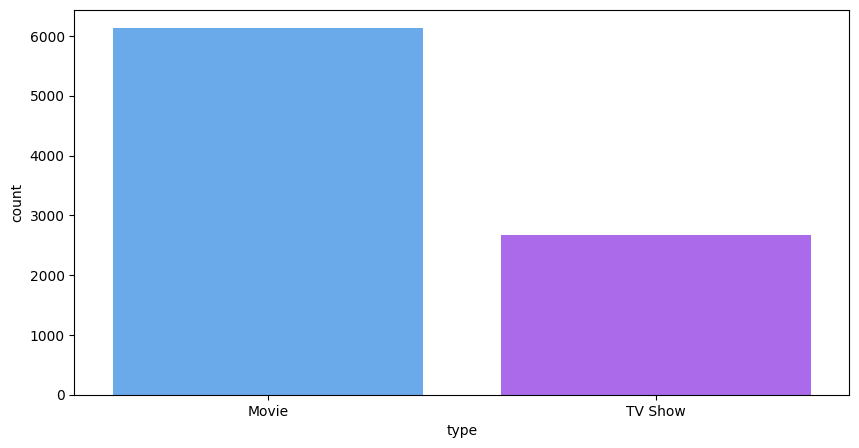

In [11]:
#Le nombre de Movies / TV Shows
sns.countplot(x = 'type', data = df, palette = "cool")
plt.show()

On remarque qu’il y a plus que 6 000 films et plus que 2 500 émissions. Donc le type majoritaire est « Movie ».

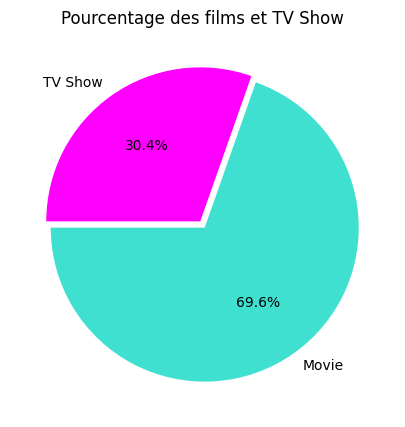

In [13]:
#Le pourcentage de Movies / TV Show qui existe dans cette base de doonées
plt.title("Pourcentage des films et TV Show")
g=plt.pie(df.type.value_counts(), colors=['Turquoise','magenta'], explode=(0.025,0.025),labels=df.type.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

Cependant, en termes de titre, il y a beaucoup plus de titres de films (69,6%) que de titres d'émissions de télévision (30,4%). Comme on peut le voir, le nombre de films disponibles sur Netflix dépasse le nombre d'émissions de télévision Cela pourrait être dû au fait que Netflix ne produit pas la majorité de son propre contenu et s'appuie sur des produits de concurrents qui développent tous leurs propres plateformes de streaming.

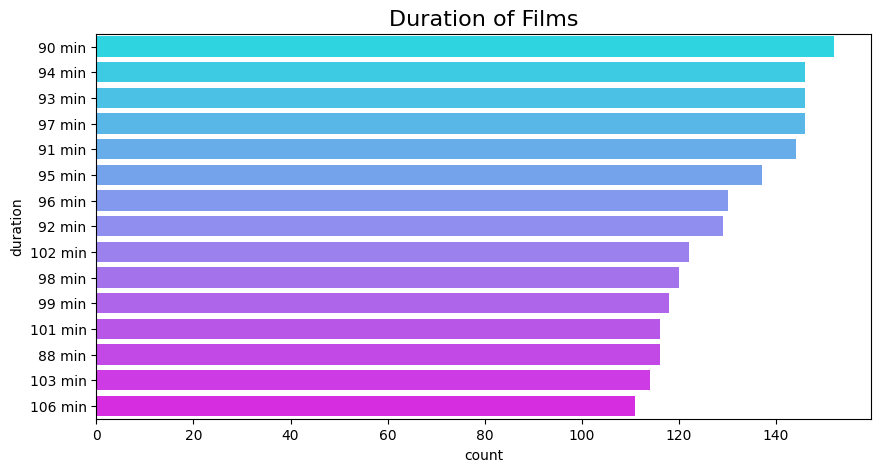

In [15]:
#L’ordre de la duration des movies
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(y ='duration', data = netflix_movies,palette='cool', order=netflix_movies['duration'].value_counts()[:15].index)
plt.title('Duration of Films',fontsize = 16);

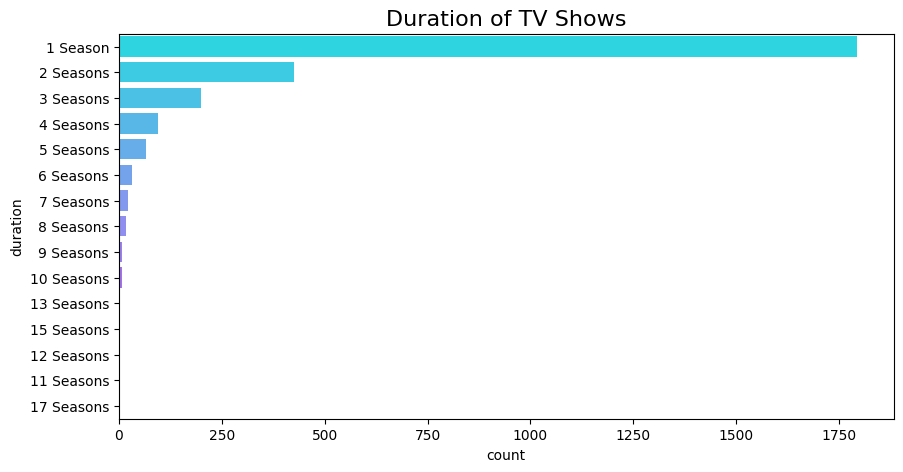

In [16]:
#L’ordre de la duration des TV Shows
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(y ='duration', data = netflix_TVshow,palette='cool', order=netflix_TVshow['duration'].value_counts()[:15].index)
plt.title('Duration of TV Shows',fontsize = 16);

In [17]:
#Le pourcentage des séries avec une saison
#Le nombre des séries selon les saisons
netflix_TVshow['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

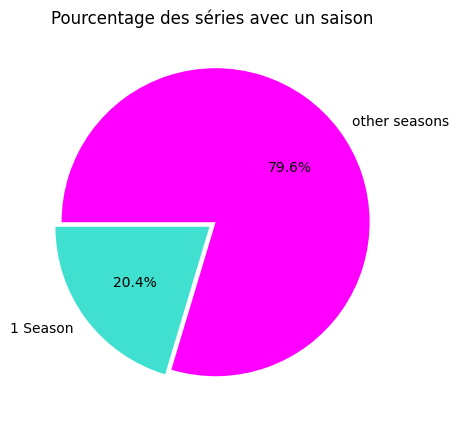

In [18]:
counts = df['duration'].value_counts()
count_1_season = counts["1 Season"]
count_other_seasons = sum(counts) - count_1_season
values = [count_1_season, count_other_seasons]

plt.figure(figsize=(10,5))
plt.title("Pourcentage des séries avec un saison")
plt.pie(values,
        explode=(0.025,0.025), labels=["1 Season","other seasons"], 
        colors=['Turquoise','magenta'],
        autopct='%1.1f%%', 
        startangle=180)
plt.show()

In [19]:
#L’année dont on a produit plus de Dramas 
#liste des films de catégorie "Dramas"
netflix_Dramas = df.loc[df['listed_in'].str.split(',',expand = True)[0] == "Dramas",:]
netflix_Dramas

pd.crosstab(df['release_year'],netflix_Dramas['listed_in'])
netflix_Dramas_max = netflix_Dramas.groupby('release_year').size().reset_index(name='counts').max()
netflix_Dramas_max

release_year    2021
counts           216
dtype: int64

 L'année dont on a produit le plus de Dramas est l'année 2021. Le nombre total des films de catégorie Dramas est 216.

Text(0.5, 1.0, 'Tous les genres')

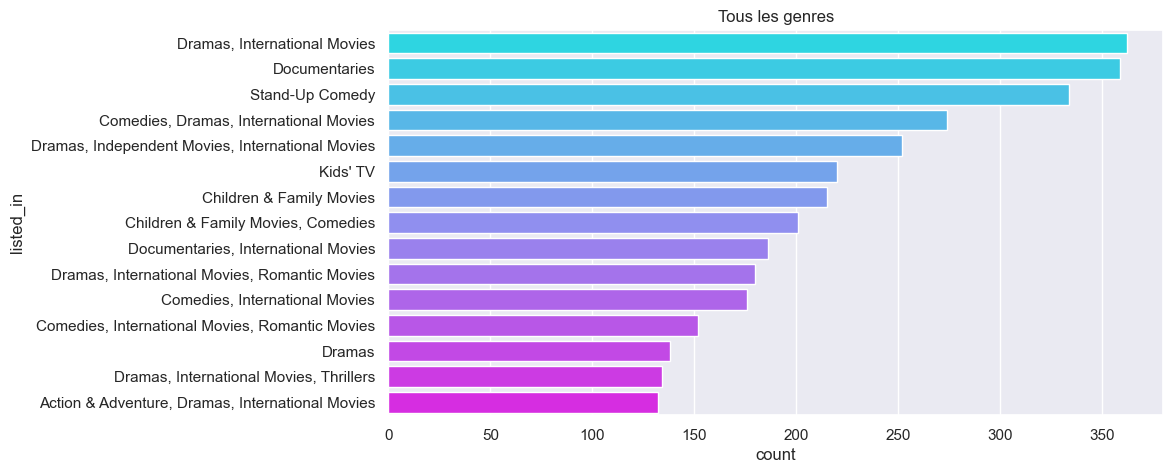

In [20]:
#Les genres dominants
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="listed_in", data=df, palette="cool", order=df['listed_in'].value_counts().index[0:15])
plt.title("Tous les genres")

Dans l’ensemble, les drames et les films internationaux représentent la majorité du contenu sur Netflix, vient après les documentaires puis les comédies et l’ensemble des autres genres. La raison est peut-être que la plupart des téléspectateurs sont des abonnés internationaux.

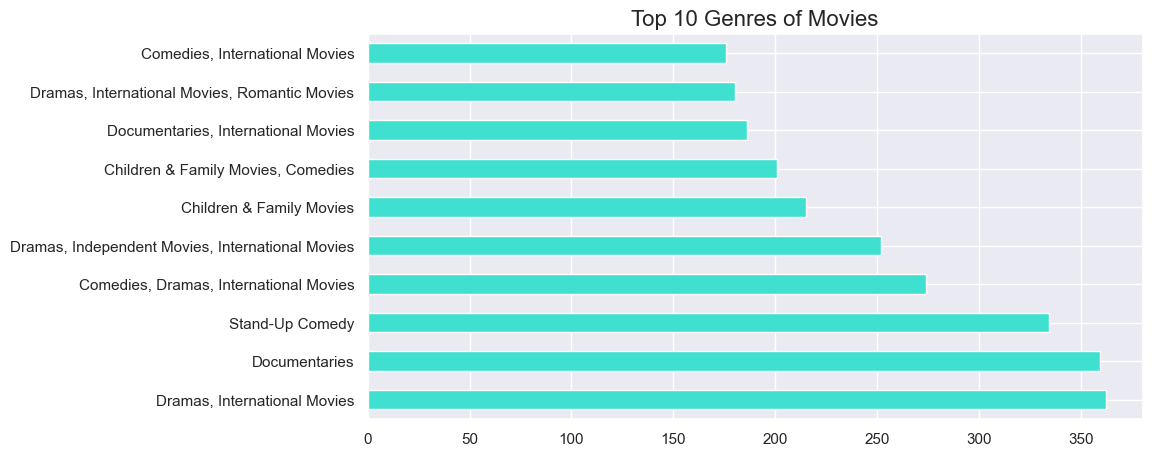

In [21]:
#Top dix genres de films
plt.figure(figsize=(10,5))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="Turquoise")
plt.title("Top 10 Genres of Movies",size=16);

Les données montrent que les films internationaux et les drames sont de loin les plus grandes catégories de films.

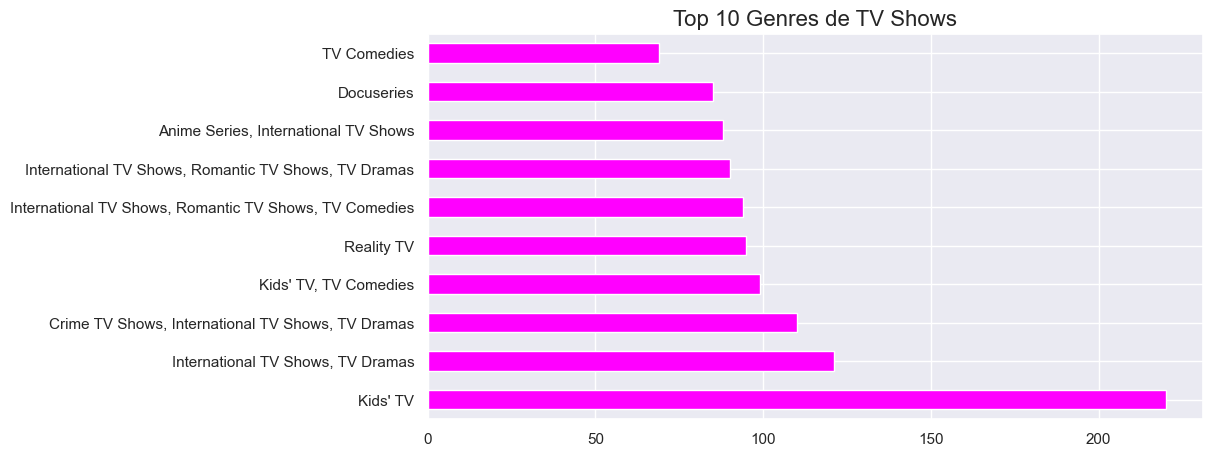

In [22]:
#Top dix genres d'émissions de télévision
plt.figure(figsize=(10,5))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="magenta")
plt.title("Top 10 Genres de TV Shows",size=16);

Les données montrent que les Kids'TV sont de loin les plus grandes catégories de TV Shows.

Text(0.5, 1.0, 'Ratings')

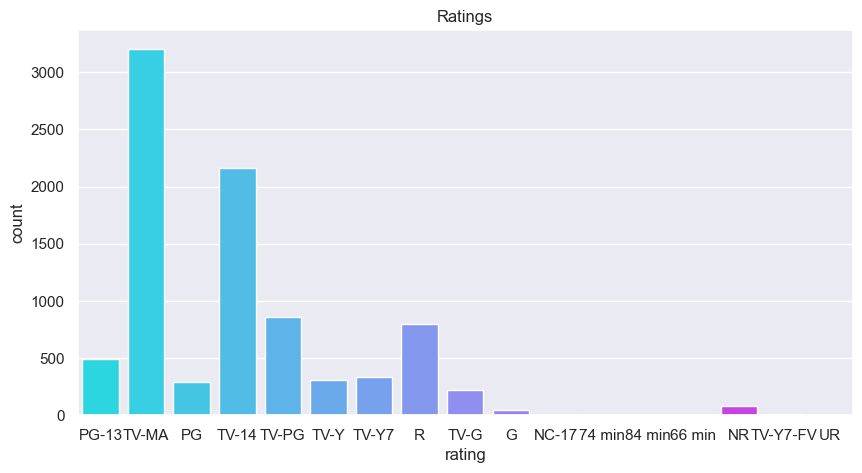

In [23]:
#Les différents types d’évaluations
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df,palette='cool')
plt.title("Ratings")

Text(0.5, 1.0, 'Movies/Tv shows Rating')

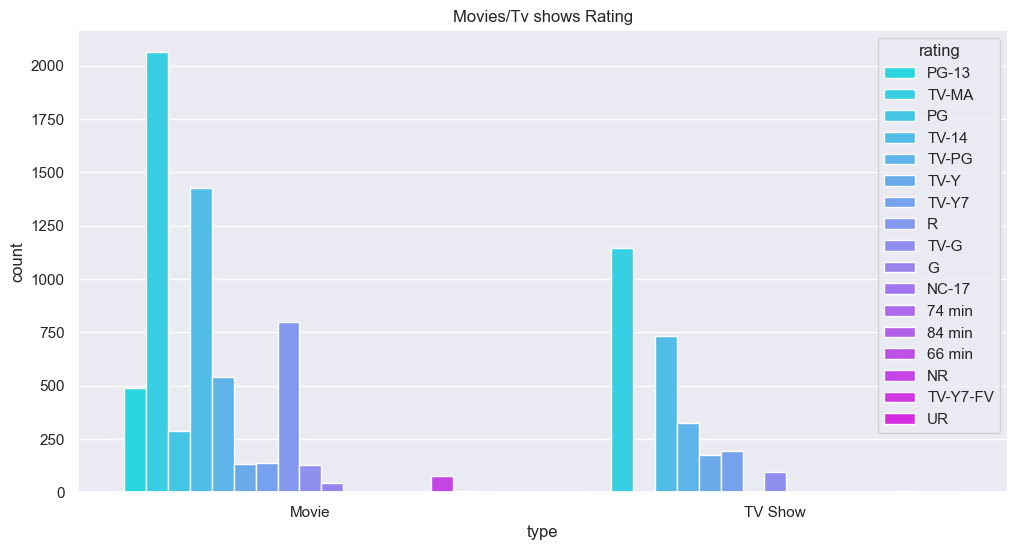

In [28]:
#Classement des films et d’émissions de télévision
plt.figure(figsize=(12,6))
sns.countplot(x='type',hue='rating',data=df,palette='cool')
plt.title("Movies/Tv shows Rating")

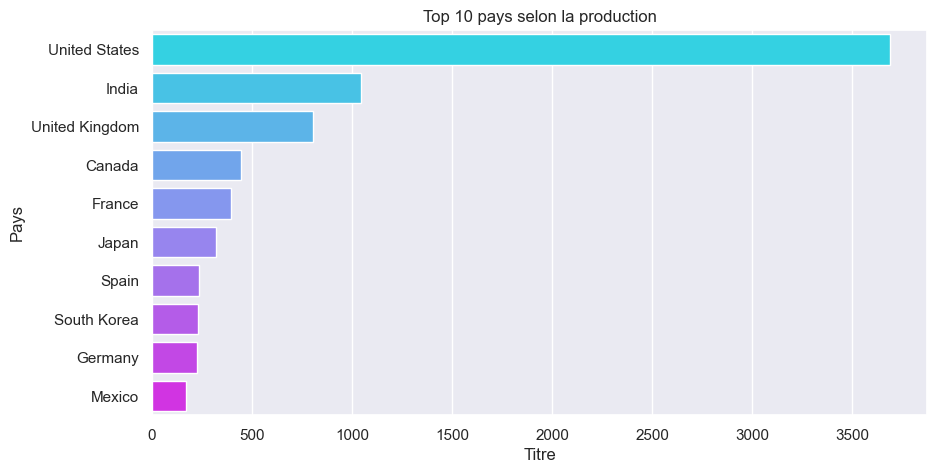

In [36]:
#Le top des 10 pays qui produisent des films et TV Shows
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(10,5))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:10],palette='cool')
plt.title('Top 10 pays selon la production')
plt.xlabel('Titre')
plt.ylabel('Pays')
plt.show()

Les États-Unis représentent la majorité des contenus créés sur Netflix, comptant près de 3000 titres, après vient L'Inde et le fait que le contenu Indien vient en deuxième lieu est dû à la popularité des productions de Bollywood.

C:\Users\dell\AppData\Local\Temp\ipykernel_8940\1333289653.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


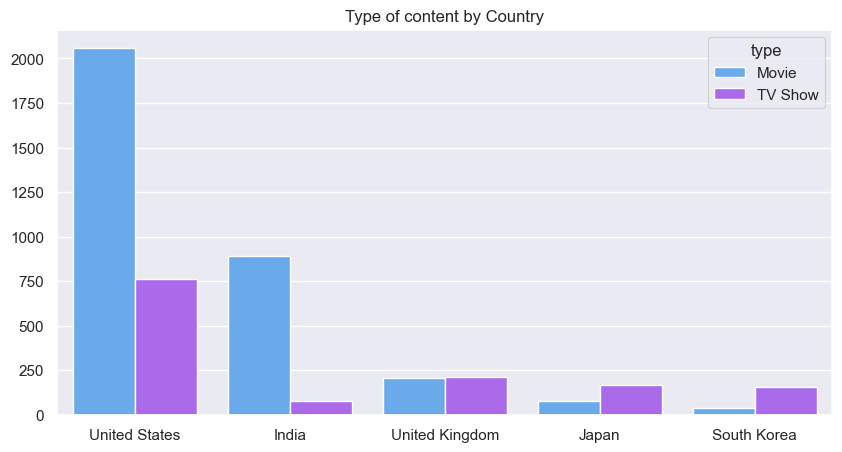

In [37]:
#Le type de contenu produit par pays
data_country = df.groupby(['country']).count()['show_id'].to_frame().reset_index()
data_country = data_country.sort_values('show_id',ascending=False)
data_country = data_country.head(5).reset_index(drop=True)
list_c = data_country['country']
top_8_data = df[df['country'].isin(list_c)]
year_with_show = top_8_data.groupby(['country','type']).count()['show_id'].to_frame().reset_index()
year_with_show = year_with_show.sort_values(by = 'show_id', ascending= False)

plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,5))
sns.barplot(x="country", y="show_id", hue="type",data= year_with_show,palette='cool')
plt.xlabel("")
plt.title('Type of content by Country')
plt.ylabel("")
plt.show()

Les films produits aux États-Unis constituent la majorité du contenu global et de ce pays. Il convient de noter que les films indiens constituent également une composante majeure, encore une fois en raison de la popularité et de la taille du marché de Bollywood.

Text(0.5, 1.0, 'Number of shows released per year')

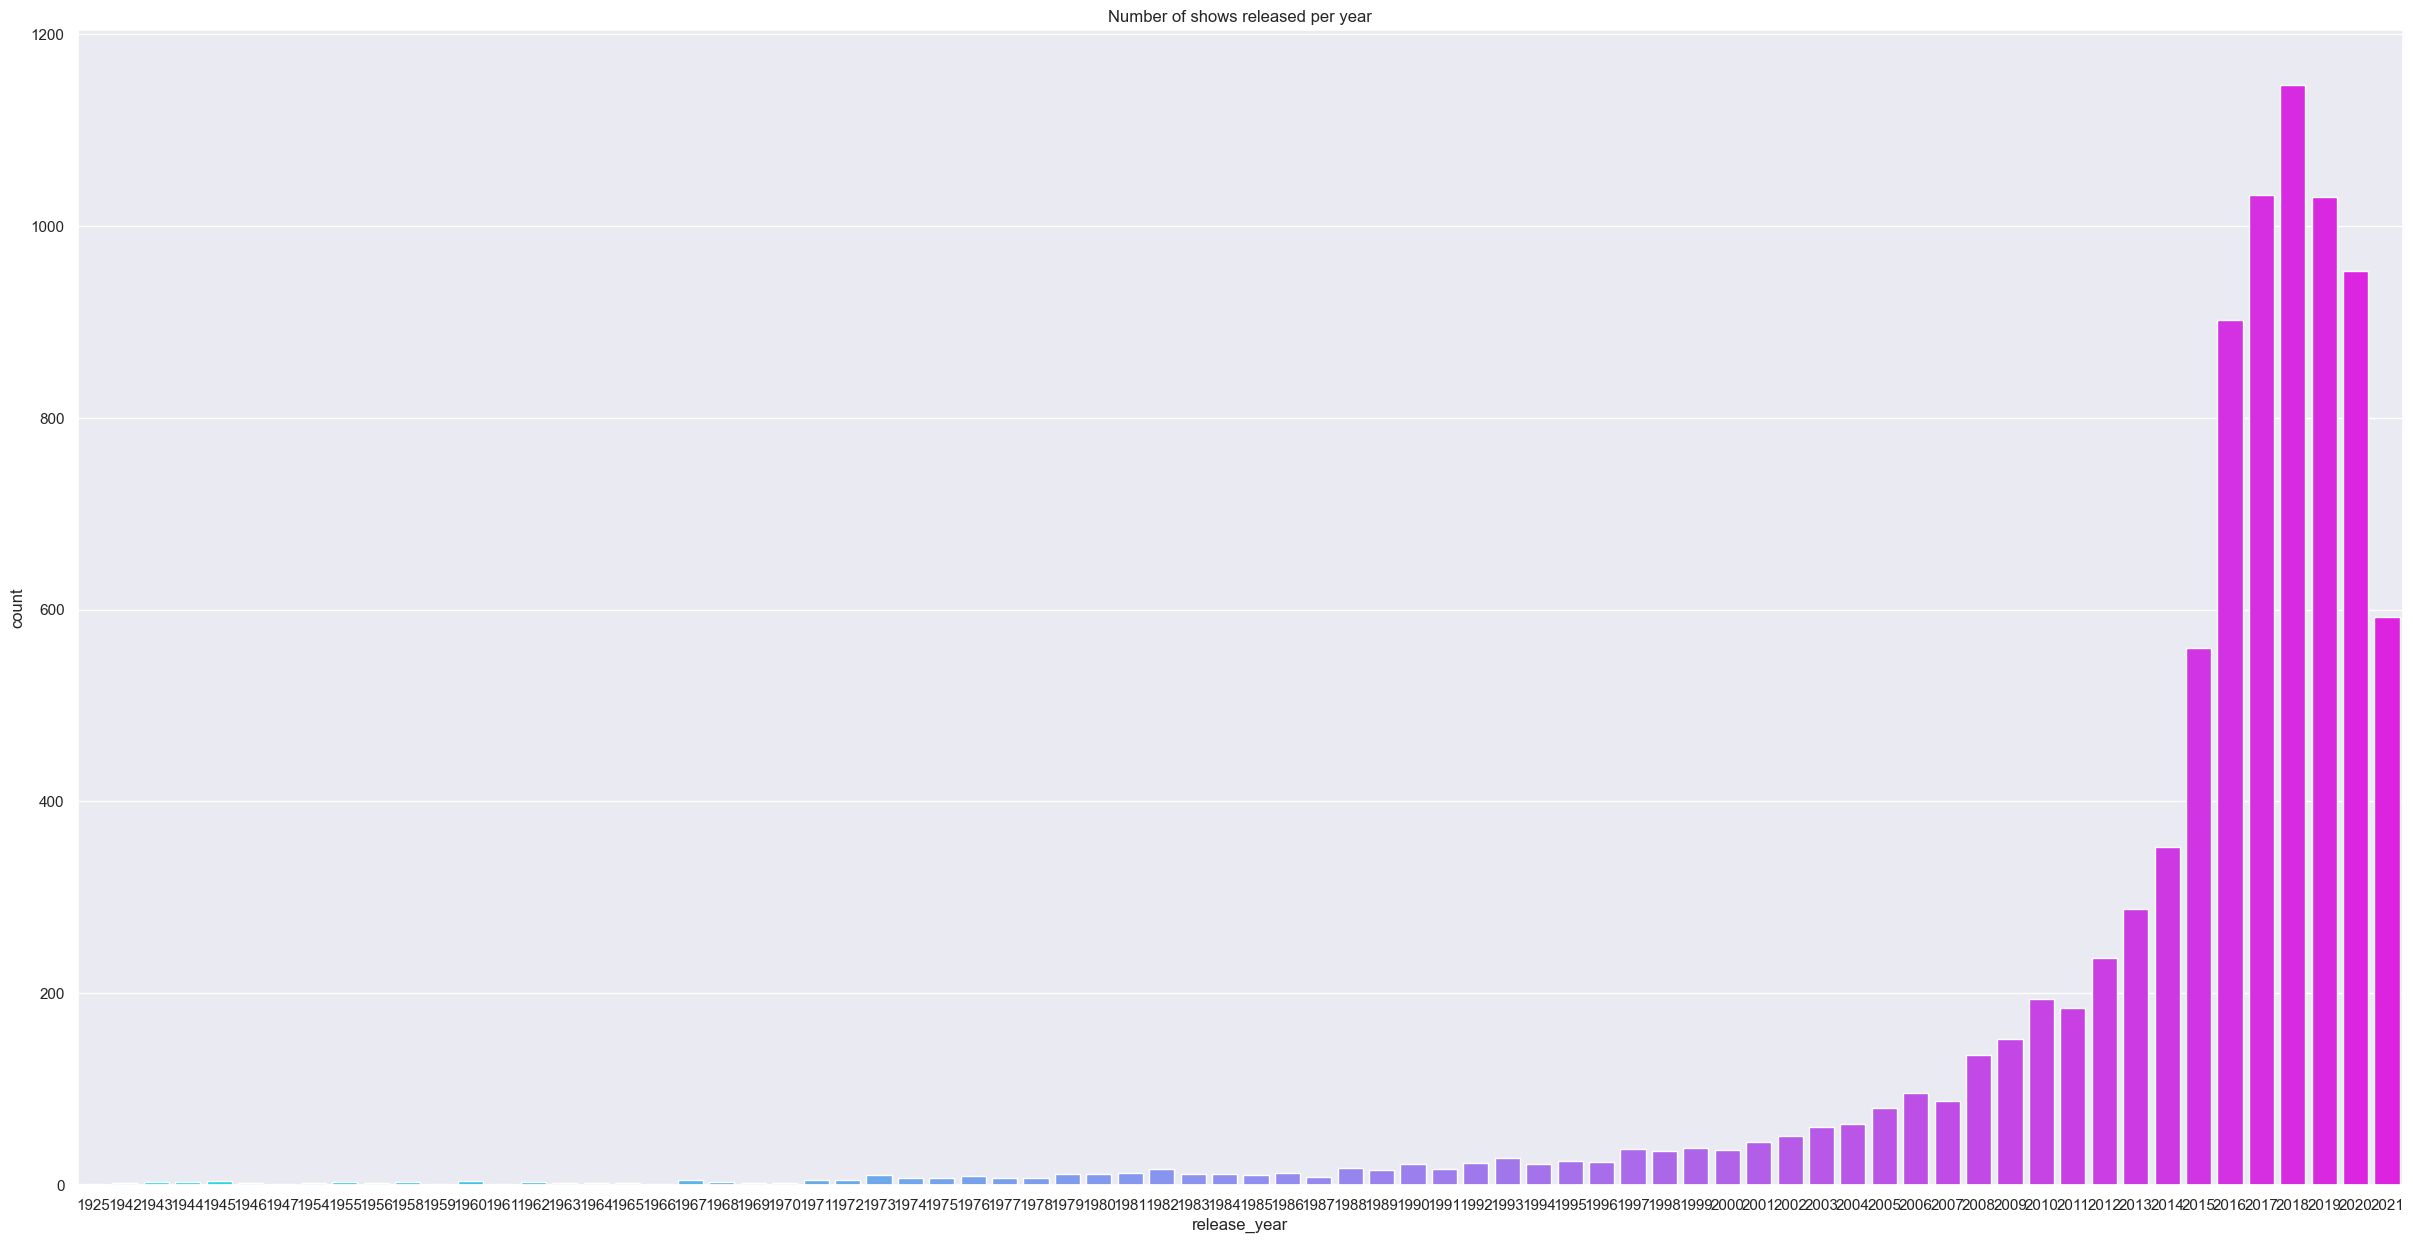

In [33]:
#Nombre de spectacles diffusé par an
plt.figure(figsize=(30,15))
sns.countplot(x='release_year', data=df, palette='cool')
plt.title("Number of shows released per year")

En fonction de la chronologie donnée, nous pouvons déterminer qu'une plate-forme de streaming populaire a commencé à prendre de l'ampleur après 2013. Et depuis lors, le contenu ajouté a considérablement augmenté.

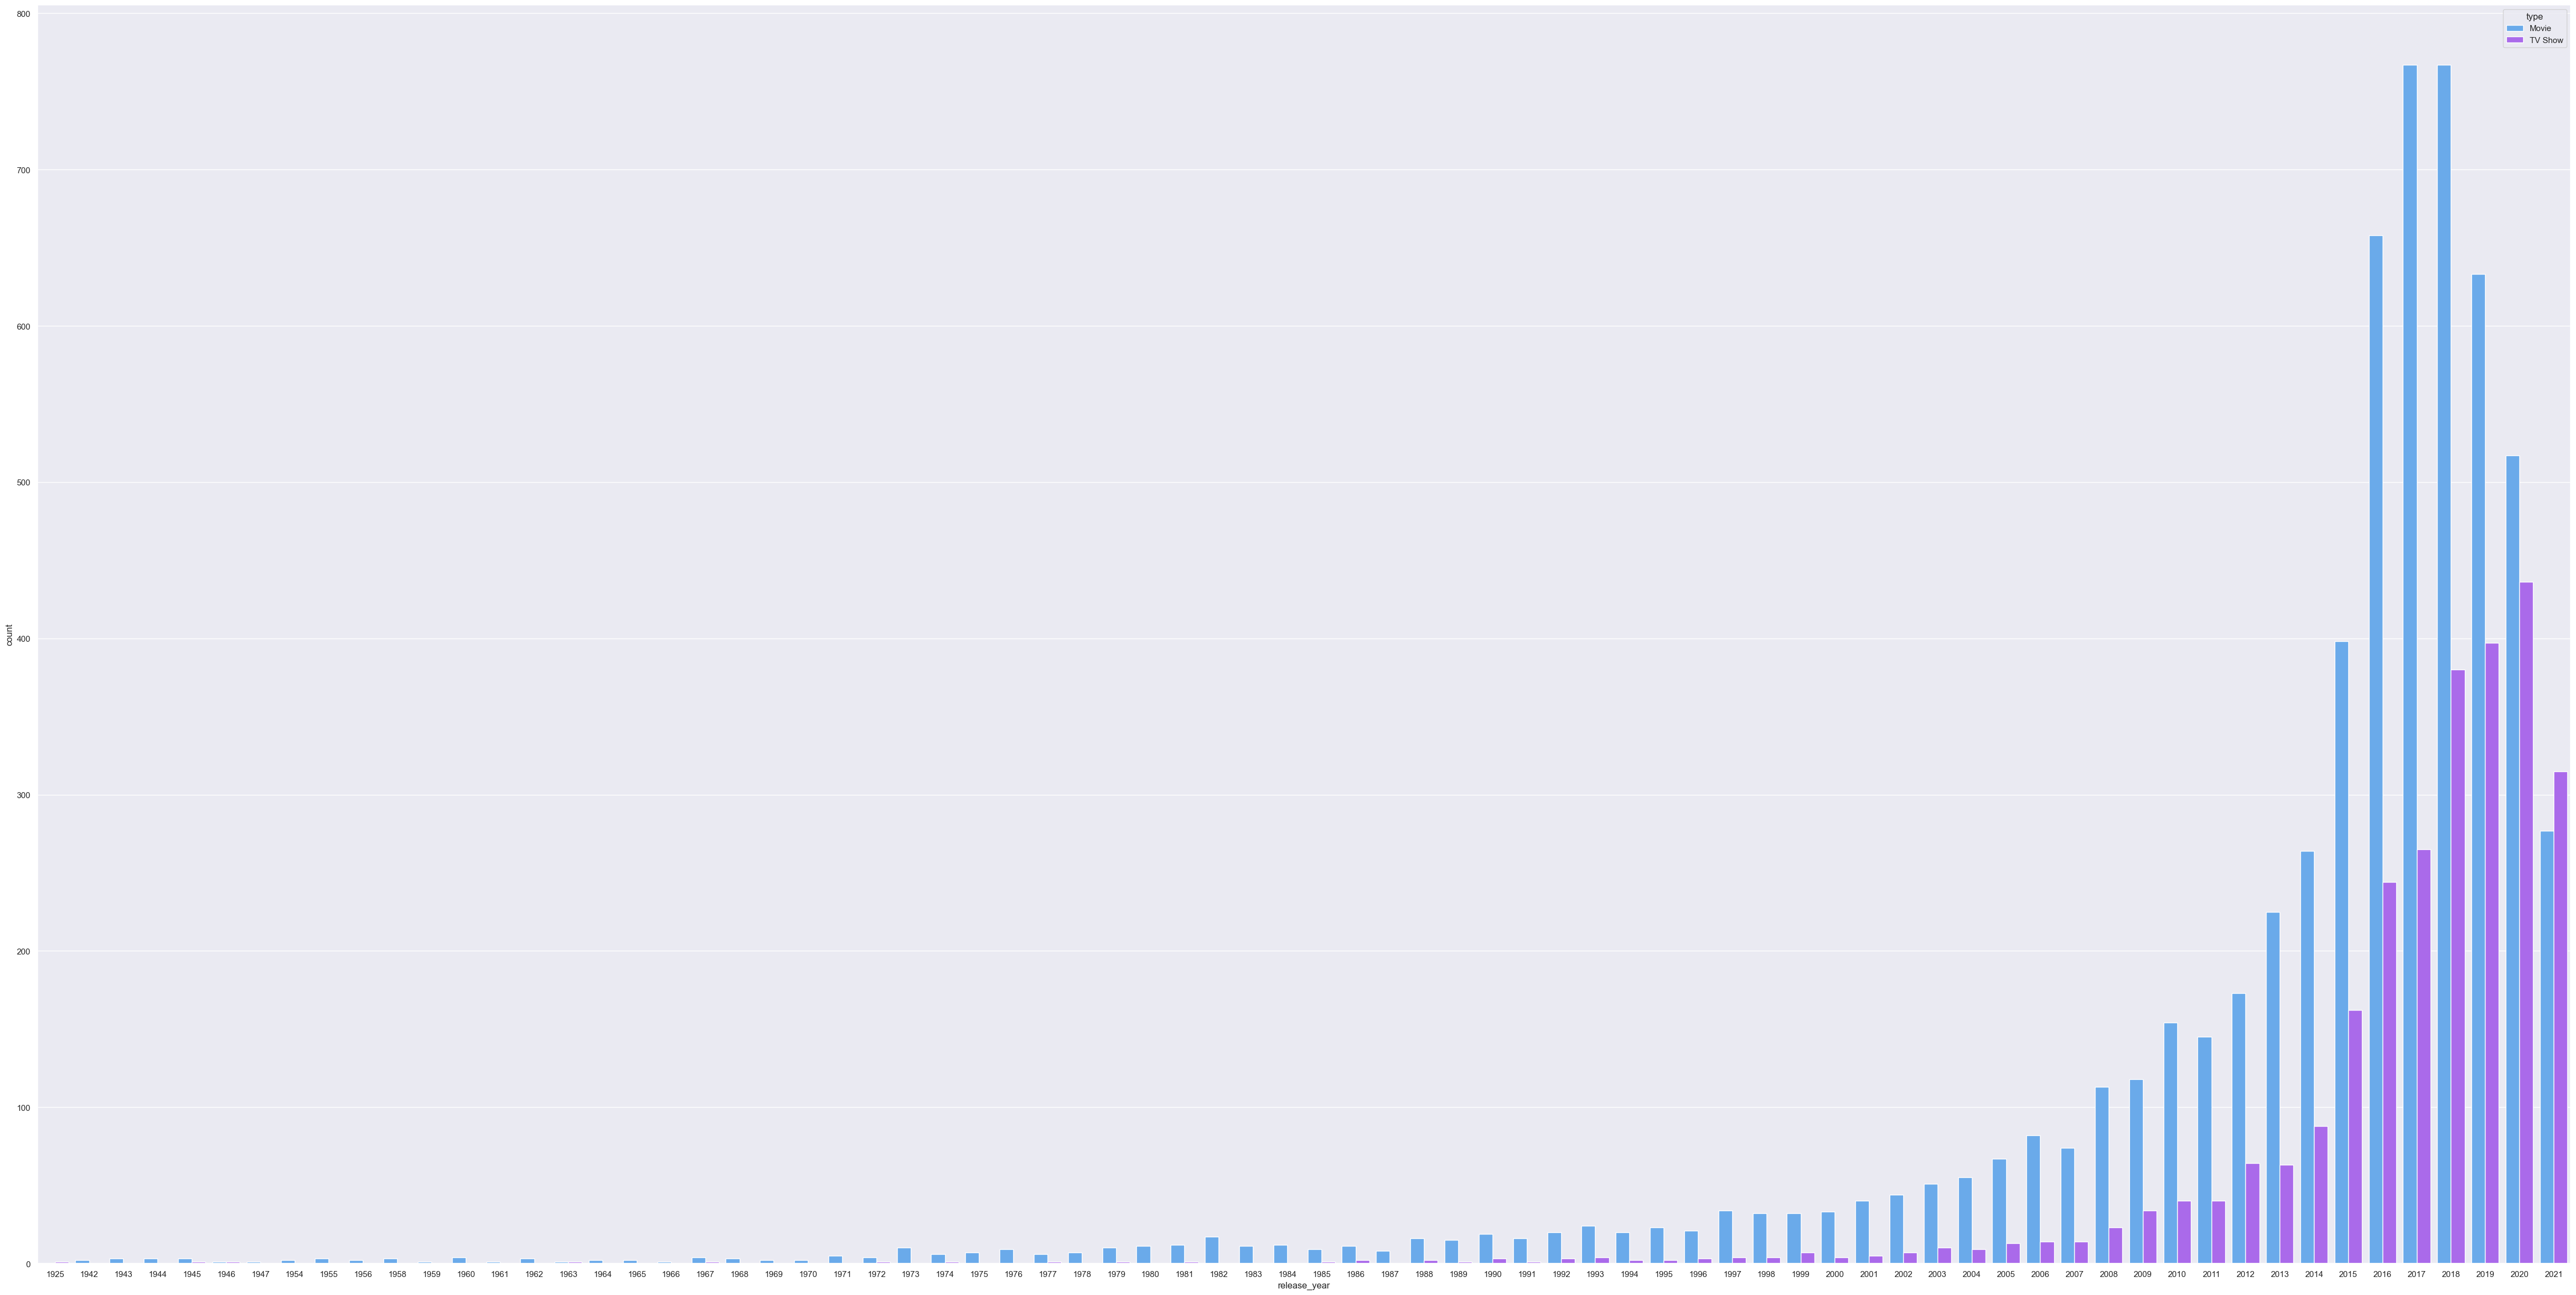

In [40]:
#Nombre films & TV Shows réalisé par an
plt.figure(figsize=(60,30)) 
sns.countplot(data=df,x='release_year',hue='type',palette = "cool")
plt.show()

En basant sur la chronologie, nous pouvons voir qu'il y a beaucoup plus de sorties de films que de sorties d'émissions de télévision. Cependant, vers 2017, la croissance des films a commencé à décliner tandis que les émissions de télévision ont constamment affiché une croissance significative au cours des dernières années.